Install Diffusers library in edit mode, to show changes instantly without building package

In [3]:
!pip3 install -e .

Obtaining file:///diffusers_hairstyle_transfer
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for diffusers (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.17.0.dev0-0.editable-py3-none-any.whl size=10527 sha256=28f555fe75e3a4f8e6ca0415d4d490a42c2aae1f733a803c45841c4330562d5f
  Stored in directory: /tmp/pip-ephem-wheel-cache-tgfbc4li/wheels/0c/70/26/b2908a33ed5f8ac1a7f73651c6b155046495e5eae9938d17ef
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.17.0.dev0
    Uninstalling diffusers-0.17.0.dev0:
      Successfully uninstalled diffusers-0.17.0.dev0


# Installing Other required modules
 - You will need to install face_alignment library and also dlib library<br/>
 - Use this for installing face-alignment : pip install face-alignment<br/>
 - Use this resource to install dlib : https://kumarvinay.com/installing-dlib-library-in-ubuntu/
 - You will also need facial landmarks predictor model: Download using this link http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
 - Creating Facial masks has been taken from this repo: https://github.com/subrtade662/hairstyle_transfer

In [1]:
import face_alignment
import numpy as np
import random
import PIL
import diffusers
import matplotlib.pyplot as plt
import cv2
from io import BytesIO
import torch
import PIL
import requests
from diffusers import RePaintPipeline, RePaintScheduler
from utils import split_image

In [9]:
batch_size = 8 #how many different versions you wanna see
original_image = cv2.imread('hair_samples/00010.jpg') #point to image path
_, _,mask_image = split_image(original_image,return_mask=True)

mask_image = (mask_image*255).astype(np.uint8)
original_image = PIL.Image.fromarray(original_image[:,:,::-1].astype(np.uint8))
mask_image = PIL.Image.fromarray(mask_image)
original_image_batch = [original_image for _ in range(batch_size)]
# Load the RePaint scheduler and pipeline based on a pretrained DDPM model
scheduler = RePaintScheduler.from_pretrained("google/ddpm-ema-celebahq-256")
pipe = RePaintPipeline.from_pretrained("google/ddpm-ema-celebahq-256", scheduler=scheduler)
pipe = pipe.to("cuda")

generator = [torch.Generator(device="cuda").manual_seed(random.randint(0,10000)) for i in range(batch_size)]
output = pipe(
    image=original_image_batch,
    mask_image=mask_image,
    num_inference_steps=250,
    eta=0.5,# change this b/w 0-1 
    jump_length=10,
    jump_n_sample=10,
    generator=generator,
)
inpainted_image = output.images[0]

Number of faces detected: 1
Detection 0: Left: 46 Top: 81 Right: 201 Bottom: 236
Part 0: (50, 125), Part 1: (52, 145) ...
me here


  0%|          | 0/4570 [00:00<?, ?it/s]

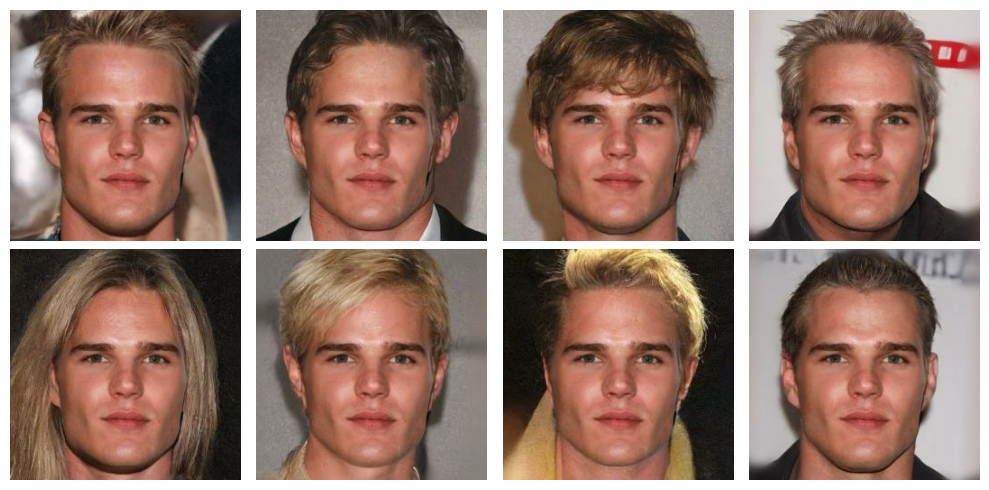

In [15]:
num_rows = 2
num_cols = 4
figsize = (10,5)
_, ax = plt.subplots(num_rows, num_cols, figsize=figsize)
for i, image in enumerate(output.images):
    if num_rows == 1:
        ax[i].imshow(image)
        ax[i].axis("off")
    else:
        ax[i // num_cols, i % num_cols].imshow(image)
        ax[i // num_cols, i % num_cols].axis("off")

plt.tight_layout()
plt.show()